# Data visualization with HaberMan Dataset

# Objective

To visualize the survival of the patients who had undergone surgery for the breast cancer

# Basic Information

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#Load 'Haberman' data set into pandas dataframe
haber = pd.read_csv("haberman.csv")
haber.columns=['age','year','nodes','surv_status']

In [2]:
haber.head()

,age,year,nodes,surv_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [3]:
haber.tail()

,age,year,nodes,surv_status
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2
304,83,58,2,2


In [6]:
# No.of data-points and features

print(haber.shape)

(305, 4)


In [7]:
# Column names of the Data set

print(haber.columns)

Index(['age', 'year', 'nodes', 'surv_status'], dtype='object')


In [9]:
# No of Data points present for each class 

haber['surv_status'].value_counts()

# Haberman data set is imbalanced as there is a huge difference in no.of data points in each class

1    224
2     81
Name: surv_status, dtype: int64

# 2-D Scatter Plot

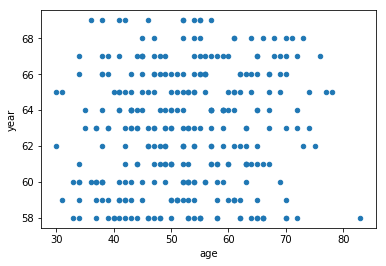

In [12]:

haber.plot( kind='scatter', x='age', y='year' )

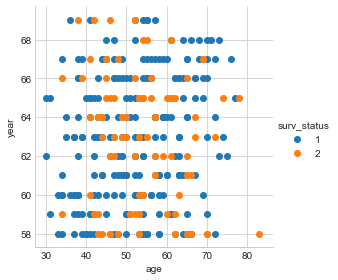

In [19]:
sns.set_style("whitegrid")
sns.FacetGrid(haber , hue="surv_status", size=4)\
   .map(plt.scatter, "age", "year")\
   .add_legend()

plt.show()

**Observations:**
    
    1.Using 'age' and 'year' features we are not able to separate the patients who have survived 5 or more years and
      survived less than 5 years , as they are overlapped
    2.Separating is much harder in this case  

# Pair Plot

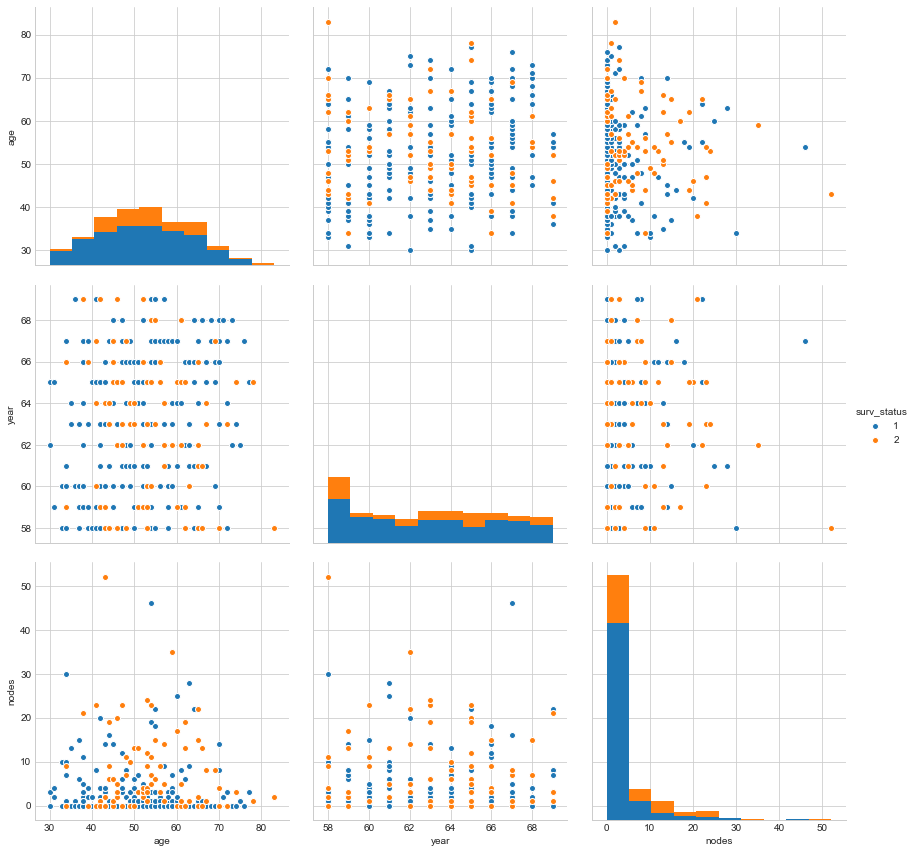

In [40]:
plt.close()
sns.set_style("whitegrid")
sns.pairplot(haber, hue="surv_status",vars=['age','year','nodes'], size=4)
plt.show()

**Observations**
     
    1. Here no feature is gonna be useful as all the points are overlapped.
    2. classification is much harder as the data set is highly imbalanced.

# Univarite Analysis :


## Histogram

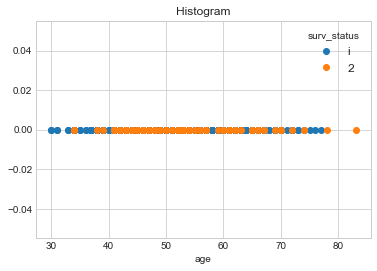

In [36]:
haber_one = haber.loc[haber['surv_status']== 1]
haber_two = haber.loc[haber['surv_status']== 2]

plt.plot(haber_one['age'],np.zeros_like(haber_one['age']),'o',label='i')
plt.plot(haber_two['age'],np.zeros_like(haber_two['age']),'o',label='2')

plt.title('Histogram')
plt.xlabel('age')
plt.legend(title='surv_status',fontsize="large",loc='upper_left')
plt.show()

**Observations**

    1. Here all the point are overlaped, and we even dont know how many points are exist
    2. So predicting the patients ,who have survived 5 or more years and survived less than 5 years  is mucha harder
    3. So we can use Histograms for better understanding and for getting goog results

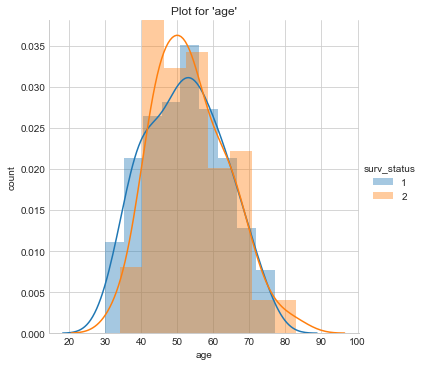

In [44]:

sns.FacetGrid(haber, hue="surv_status" , size=5)\
    .map(sns.distplot,"age")\
    .add_legend()
plt.ylabel('count')
plt.title("Plot for 'age'")

plt.show()

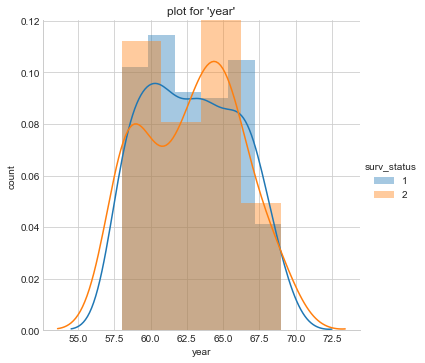

In [45]:

# PLot for single feature
sns.FacetGrid(haber, hue="surv_status" , size=5)\
    .map(sns.distplot,"year")\
    .add_legend()

plt.ylabel('count')
plt.title("plot for 'year'")
plt.show()

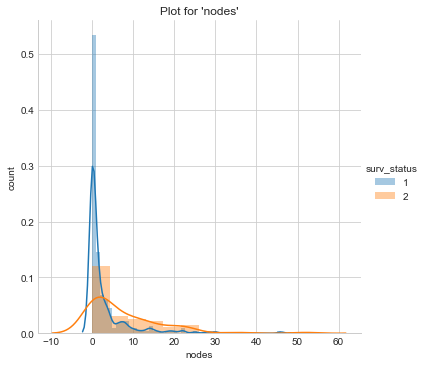

In [46]:
sns.FacetGrid(haber, hue="surv_status" , size=5)\
    .map(sns.distplot,"nodes")\
    .add_legend()

plt.ylabel('count')
plt.title("Plot for 'nodes'")
plt.show()

**Observations**:
    
    1.Here as we see plots for all the features except 'surv_status' are alomost fully overlapped,so we cant make 
      any prediction or classification on those plots
    2.As we see the plot for the feature 'surv_status'  are separated so well ,so we can classify survival status 
      of the patients.
   

## PDF, CDF

[0.04910714 0.10714286 0.125      0.09375    0.16517857 0.16517857
 0.09375    0.11160714 0.0625     0.02678571]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


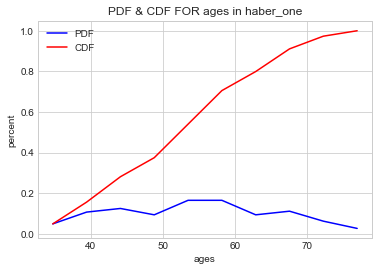

[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


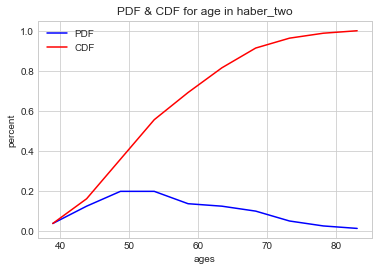

In [26]:

# PDf is probability Density Function is used to define a particular prbability distribution 
# CDF is Cummulative DEnsity Function ,it can be used along with PDF and will be very useful for 
# determining PErdentage of points that have a particular value

counts,bin_edges =np.histogram(haber_one['age'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,'-b',label="PDF")
plt.plot(bin_edges[1:], cdf,'-r',label="CDF")
plt.xlabel('ages')
plt.ylabel('percent')
plt.title("PDF & CDF FOR ages in haber_one")
plt.legend()
plt.show()

counts,bin_edges =np.histogram(haber_two['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,'-b',label="PDF")
plt.plot(bin_edges[1:],cdf,'-r',label="CDF")
plt.xlabel("ages")
plt.ylabel("percent")
plt.title('PDF & CDF for age in haber_two')
plt.legend()
plt.show()

**Observations**
    
    1. Here both PDF and CDF are almost overlapped 
    2. We can get the percentage of values  (by seeing y-axis) less than the particular value (by seeing x_axis)
    3. Here 100% of values are less than 80.6 in haber_two

## Mean, Variance & Standard deviaton

In [45]:
# Mean is the cimple Average of all the items,it tells the central tendancy
print("Means: ")
print(np.mean(haber_one['nodes']))
print(np.mean(haber_two['nodes']))

print("\nMean with Outlier: ")
print(np.mean(np.append(haber_one['nodes'],60)))
print(np.mean(np.append(haber_two['nodes'],60)))


# variance and standard deviation says what is the range of distribution,ans how widely it spreads
print("\nStandard deviation: ")
print(np.std(haber_one['nodes']))
print(np.std(haber_two['nodes']))




Means: 
2.799107142857143
7.45679012345679

Mean with Outlier: 
3.0533333333333332
8.097560975609756

Standard deviation: 
5.869092706952767
9.128776076761632


**Observations**

    1.Here if there is any Outlier the mean will change
    2.Here haber_one distribution has low spread i.e, the points are so dense as compared to haber_two

## Median, Percentile, Quantile, MAD

In [63]:

# Median is the middle element
print("Median: ")
print(np.median(haber_one['nodes']))
print(np.median(haber_two['nodes']))

print("\nMedian with Outlier: ")
print(np.median(np.append(haber_one['nodes'],60)))
print(np.median(np.append(haber_two['nodes'],60)))

# Percentile will say how much percentage of values are less than or greater than from the particular value
print("\n50th percentile: ")
print(np.percentile(haber_one['nodes'],50))
print(np.percentile(haber_two['nodes'],50))


# Quantile is basically breaking the data points into four regions
print("\nQuantiles: ")
print(np.percentile(haber_one['nodes'],np.arange(0,100,25)))
print(np.percentile(haber_two['nodes'],np.arange(0,100,25)))

# MAD is Median Absolute Deviation gives the median of absolute deviation of all the values
from statsmodels import robust
print ("\nMedian Absolute Deviation: ")
print(robust.mad(haber_one['nodes']))
print(robust.mad(haber_two['nodes']))


Median: 
0.0
4.0

Median with Outlier: 
0.0
4.0

50th percentile: 
0.0
4.0

Quantiles: 
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

Median Absolute Deviation: 
0.0
5.930408874022408


 **Observations:**
    
    1. Here mean and median will give similar results,and median value will not be affected to the outlier 
       until there will be atlaest 50% of data points corrupt
    2. Here the 50th percentile is thw median

# Box plot and Whiskers

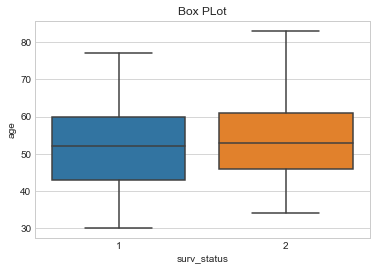

In [48]:
sns.boxplot(x='surv_status', y='age', data=haber)
plt.title('Box PLot')
plt.show()

**Observations:**
    
    1.Here the box representng 25th, 50th, 75th percentile values,and it has extreme points those are whiskers
    2.The two boxes appears to be align in same ,so that means there is overlap

# Violin plots

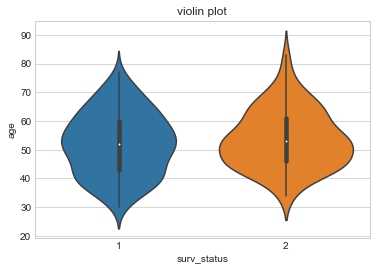

In [47]:
sns.violinplot(x='surv_status', y='age', data=haber,size=8)
plt.title("violin plot")
plt.show()

**Observations:**
    
    1.Here Violin plot alos has a box plot inside it, white dot in the midle represents 50th percentile,
      above and below the white dot represents 75th and 25th percentile 
    2.it also has Probability Distribution Function on both sides symmetric to each other

# Multivariate probability density, contour plot.

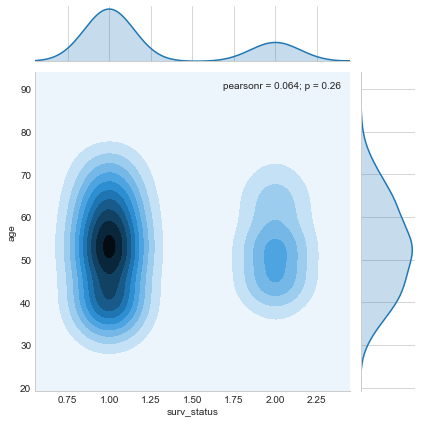

In [54]:
sns.jointplot(x="surv_status", y="age", data=haber, kind="kde");
plt.show();

**Observations:**
    
    1. Here as we see in the middle,the black region there is lot of points about the 'age' and 'surv_status'
    2. in the x and y axis we also have distrbuton functions that will be helpful for understanding the plot much better

# Conclusions

    1.The 'haberman' data set is highly imbalanced 
    2.classification or prediction is much harder incase of imbalance